In [1]:
import numpy as np
#import pandas as pd
from sktime.datasets import load_arrow_head

from matplotlib import pyplot as plt
from sklearn.manifold import MDS

from sktime.distances import dtw_distance
from sklearn.cluster import KMeans

In [2]:
X_train, y_train = load_arrow_head(split="TRAIN") #load_osuleaf(split="TRAIN")

X_test, y_test = load_arrow_head(split="TEST") #load_osuleaf(split="TEST")

In [3]:
D = np.zeros((X_train.shape[0],X_train.shape[0]))
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[0]):
        D[i][j] = dtw_distance(np.array([x for x in X_train.iloc[i][0]]), np.array([x for x in X_train.iloc[j][0]]))

In [4]:
Demb = MDS(n_components=2, metric=True, dissimilarity='precomputed', random_state=0)

In [5]:
demb = Demb.fit_transform(D)

In [6]:
X1 = np.array([demb[i] for i in range(demb.shape[0]) if y_train[i].astype(int)==1]).transpose()
X2 = np.array([demb[i] for i in range(demb.shape[0]) if y_train[i].astype(int)==2]).transpose()
X0 = np.array([demb[i] for i in range(demb.shape[0]) if y_train[i].astype(int)==0]).transpose()
eX = [X0,X1,X2]

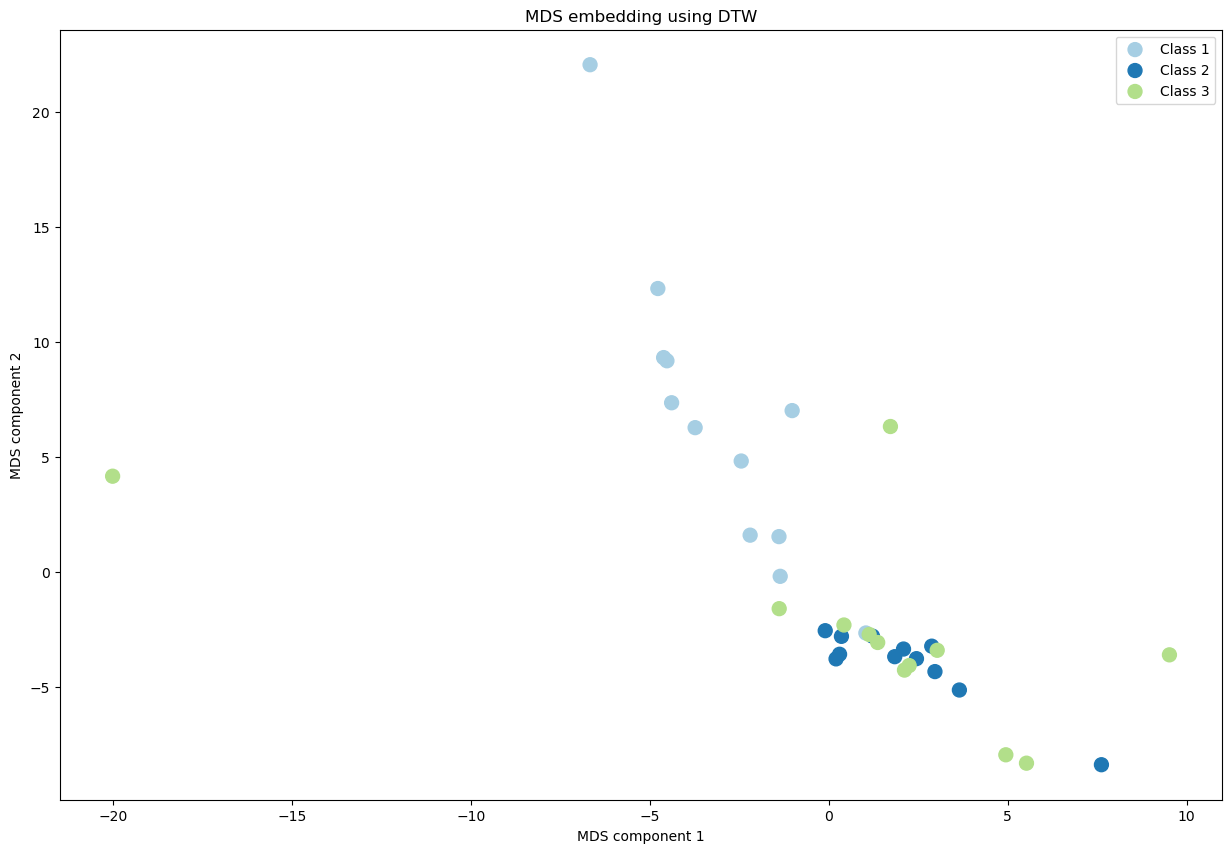

In [7]:
#plt.scatter(demb.transpose()[0], demb.transpose()[1], c=y_train.astype(float),cmap="Paired")
cmap = plt.cm.Paired
plt.figure(figsize = (15,10))
for i in range(1,4):
    plt.scatter(eX[i-1][0], eX[i-1][1], s=100, c=cmap([i-1 for j in range(eX[i-1].shape[1])]), 
                label="Class {:g}".format(i))
    
plt.legend()
plt.xlabel('MDS component 1')
plt.ylabel('MDS component 2')
plt.title('MDS embedding using DTW')
plt.show()

In [8]:
KM = KMeans(n_clusters=3, random_state=0)
kmeans = KM.fit(demb)
y_preds = KM.predict(demb)

In [9]:
# Here's the kmeans accuracy.
rights = [1 for i in range(len(y_train)) if y_train[i].astype(float)==y_preds[i]]
score = sum(rights)/len(y_train)
print(score)

0.5833333333333334


In [10]:
# 15 trees.